In [17]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## I. Réduction de dimensions et Visualisation des données

Importer le jeu de données avec pandas

In [18]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

Réaliser une Analyse en Composantes Principales (module PCA de Scikit-learn) sur ce jeu de données
centrées réduites (StandardScaler)

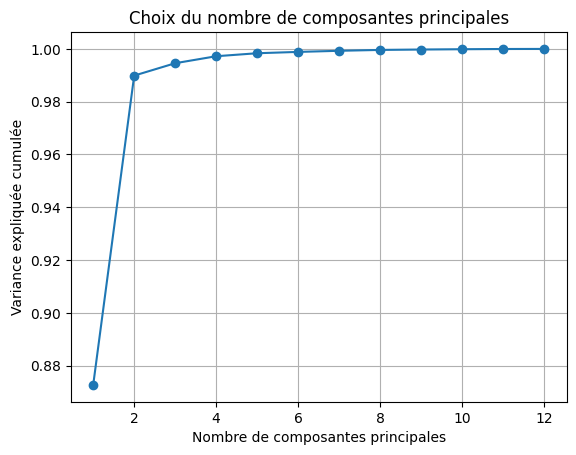

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Choix du nombre de composantes principales')
plt.grid()
plt.show()


Faire de même pour le fichier "crimes.csv". Il s’agit des statistiques de criminalité dans 50 états américains.
Dans chaque état, sept types de crimes ou délits sont repérés par leurs nombres annuels de faits constatés
rapportés sur 100 000 habitants : meurtres(Meutre), enlèvements(Rapt), vols avec violence(Vol),
agressions(Attaque), viol (Viol), vols peu importants (Larcin), vols de voitures (Auto_Theft).

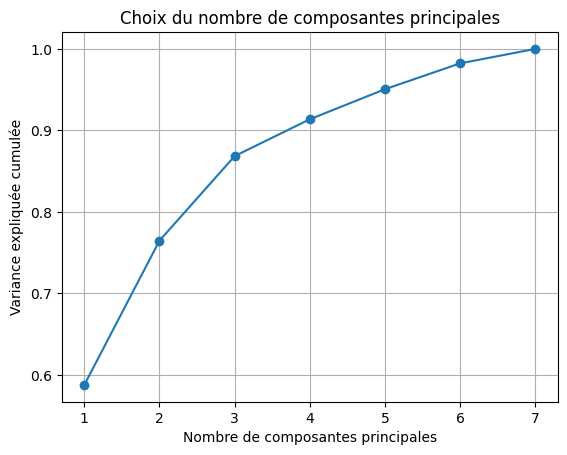

In [20]:
data_crime = pd.read_csv('./crimes.csv', sep=';')
X_crime = data_crime.iloc[:, 1:8].values
labels_crime = data_crime.iloc[:, 0].values

scaler_crime = StandardScaler()
X_scaled_crime = scaler_crime.fit_transform(X_crime)

pca_crime = PCA()
X_pca_crime = pca_crime.fit_transform(X_scaled_crime)

explained_variance_ratio_crime = pca_crime.explained_variance_ratio_
cumulative_variance_crime = explained_variance_ratio_crime.cumsum()

plt.plot(range(1, len(cumulative_variance_crime) + 1), cumulative_variance_crime, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Choix du nombre de composantes principales')
plt.grid()
plt.show()


Faire de même pour le fichier "50_Startups.csv" qui comporte 50 startups américaines décrites par leurs
dépenses en termes de R&D, d’administration et de Marketing ainsi que leur Bénéfice annuel.

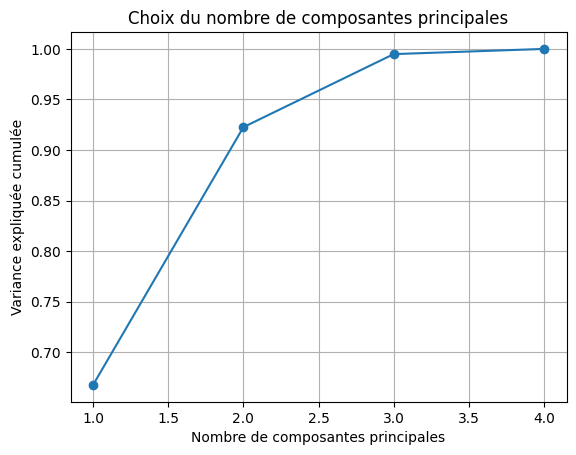

In [21]:
data_startups = pd.read_csv('./50_Startups.csv', sep=';')
X_startups = data_startups.iloc[:, :-1].values
labels_startups = data_startups.iloc[:, -1].values

scaler_startups = StandardScaler()
X_scaled_startups = scaler_startups.fit_transform(X_startups)

pca_startups = PCA()
X_pca_startups = pca_startups.fit_transform(X_scaled_startups)

explained_variance_ratio_startups = pca_startups.explained_variance_ratio_
cumulative_variance_startups = explained_variance_ratio_startups.cumsum()

plt.plot(range(1, len(cumulative_variance_startups) + 1), cumulative_variance_startups, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Choix du nombre de composantes principales')
plt.grid()
plt.show()


Faire de même pour le fichier "mammals.csv". Il s’agit des statistiques sur 62 mammifères. Pour chaque
espèce mammifère, plusieurs variables sont rapportées: Le poids corporel, le poids du cerveau, le nombre
d'heures de sommeil sans rêve, le nombre d'heures de sommeil de rêve, le nombre total d'heures de
sommeil, la durée de vie en années, le temps de gestation en jours, un indice de la probabilité que le
mammifère soit une proie, un indice du degré d'exposition du mammifère (bien protégé ou non) pendant
son sommeil, un indice du danger auquel le mammifère est confronté par les autres animaux. Cet indice est
basé sur la prédation et l'exposition (1 = moindre danger provenant des autres animaux. 5 = le plus grand
danger provenant des autres animaux).

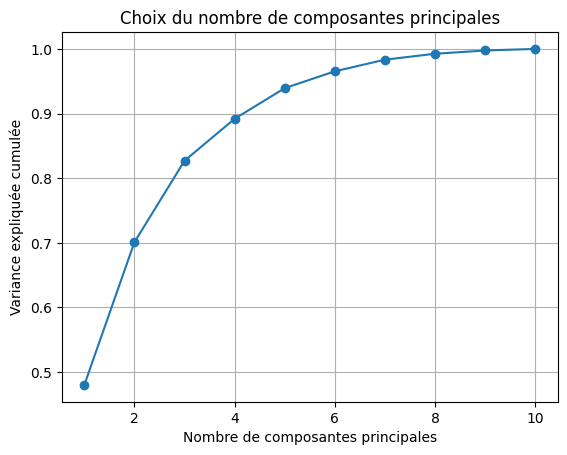

In [22]:
data_mammals = pd.read_csv('./mammals.csv', sep=';')
X_mammals = data_mammals.iloc[:, 1:].values
labels_mammals = data_mammals.iloc[:, 0].values

scaler_mammals = StandardScaler()
X_scaled_mammals = scaler_mammals.fit_transform(X_mammals)

pca_mammals = PCA()
X_pca_mammals = pca_mammals.fit_transform(X_scaled_mammals)

explained_variance_ratio_mammals = pca_mammals.explained_variance_ratio_
cumulative_variance_mammals = explained_variance_ratio_mammals.cumsum()

plt.plot(range(1, len(cumulative_variance_mammals) + 1), cumulative_variance_mammals, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Choix du nombre de composantes principales')
plt.grid()
plt.show()

## II. Clustering

Appliquez la procédure KMeans sur ce jeu de données pour obtenir 3 clusters
- Donner une visualisation graphique des villes projetées dans le plan principal. Les villes de chaque
cluster devraient avoir une couleur différente des villes des autres clusters (voir code ci-dessous).


X_pca étant la matrice des données transformées par l’ACP, labels étant le vecteur contenant le nom
des instances (ici les villes), clustering étant le clustering obtenu.
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Appliquez la procédure AgglomerativeClustering sur ce jeu de données pour obtenir trois clusters avec
différentes méthodes d’agrégation (il faut essayer single, ward, average).

Utiliser cet indice dans une boucle de 8 itérations au maximum (voir code ci-dessous). Les 4 itérations
correspondent aux 4 partitions possibles i.e. en 2, 3, 4, 5, 6, 7, 8 et 9 classes issues de KMeans. Déduire la
meilleure partition qui correspond à un indice maximal pour l’indice Silhouette.

Si nous souhaitons avoir 3 clusters, quelle méthode (entre les 4 testées précédemment) donnera la meilleure
partition en 3 clusters ? Commenter le résultat obtenu.

Proposer une fonction qui permettra sur un jeu de données de comparer toutes ces approches et de
retourner le meilleur clustering

Appliquer la fonction précédente sur le jeu de données "segmentation_data.csv".
